<a href="https://colab.research.google.com/github/xzdil/googlecollabprojects/blob/main/Jokes_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

# Утилиты.
import platform
import time
import pathlib
import os

In [ ]:
df = pd.read_csv('jokes.csv')
df['theme'].unique()

array(['pro-sudey', 'pro-studentov', 'pro-sport-pro-futbol',
       'pro-sisadminov', 'pro-semyu', 'pro-poruchika-rgevskogo',
       'pro-putina', 'pro-programmistov', 'pro-novih-russkih',
       'pro-narkomanov', 'pro-mugchin', 'pro-militsiyu', 'pro-kompyuteri',
       'pro-kino', 'pro-inostrantsev', 'pro-givotnih', 'pro-genshin',
       'pro-evreev', 'pro-druzey', 'pro-detey', 'pro-vovochku',
       'pro-buhgalterov', 'pro-billa-geytsa', 'pro-armiu',
       'pro-alkogolikov', 'pro-wow', 'poshlie-i-intimnie',
       'politicheskie', 'narodnie', 'meditsinskie', 'kriminalnie',
       'cherniy-yumor', 'tsitati', 'sovetskie', 'skazochnie', 'raznie',
       'pro-shtirlitsa', 'po-shou-biznes', 'shkolnie-i-pro-shkolu',
       'pro-chukchu', 'pro-teshu', 'dorognie-pro-dorogu',
       'starie-i-borodatie', 'aforizmi'], dtype=object)

In [ ]:

def getJoke():
  text = df.loc[np.random.randint(0,len(df))]
  if text['rating'] > 10:
    return text
  return getJoke()

print(getJoke()['text'])
print(getJoke()['rating'])


У мужика был попугай он ему дал пару таблеток виагры попугай всю живность во дворе сделал и до мужика начал домогаться мужик взял его и закрыл в морозильник думал там кеша успокоиться но не тут то было открывает холодильник а кеша (весь в поту) говорит :
-Попробуй мерзлой курице ноги раздвинь!!!

53


In [ ]:
STOP_WORD_THEME = '◘ '

STOP_WORD_TEXT = '\n✼\n\n'


In [ ]:
def joke_to_string(joke):
    text = joke['text']
    if joke['theme'] != ''


    return f'{STOP_WORD_THEME}\n{STOP_WORD_TEXT}{text}'

In [ ]:
dataset_stringified = [joke_to_string(joke) for joke in df]

print('Stringified dataset size: ', len(dataset_stringified))


Stringified dataset size:  130204


In [ ]:
STOP_SIGN = '␣'

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True,
    filters='',
    lower=False,
    split=''
)

tokenizer.fit_on_texts([STOP_SIGN])

tokenizer.fit_on_texts(dataset_stringified)

tokenizer.get_config()

{'num_words': None,
 'filters': '',
 'lower': False,
 'split': '',
 'char_level': True,
 'oov_token': None,
 'document_count': 130205,
 'word_counts': '{"\\u2423": 1, "\\u25d8": 130204, " ": 3438893, "\\n": 1022826, "\\u273c": 130204, "\\u041d": 58854, "\\u0430": 1490729, "\\u0441": 795711, "\\u0443": 554108, "\\u0434": 532246, "\\u0435": 1436412, "\\u0432": 690502, "\\u0421": 46842, "\\u0442": 1176117, "\\u043c": 512128, "\\u0431": 269306, "\\u043b": 673484, "\\u043e": 1723828, "\\u0438": 1316271, "\\u043d": 968157, "\\u044f": 336665, "\\u044b": 300283, "\\u0306": 213223, "\\u043a": 629210, "\\u0437": 263136, ":": 114958, "\\r": 502010, "-": 283993, "\\u0436": 185500, "\\u0440": 747958, "\\u043f": 448386, "\\u0433": 270091, ".": 420721, "\\u0447": 267840, "\\u044c": 322161, "\\u044e": 116167, "\\u0445": 136737, "\\u0412": 64355, ",": 322971, "?": 92176, "\\u0414": 42530, "\\u041f": 63412, "\\u044d": 42921, "\\u041e": 42041, "\\"": 107278, "\\u0427": 18109, "\\u0418": 32861, "\\u0448":

In [ ]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1

print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  256


In [ ]:
dataset_vectorized = tokenizer.texts_to_sequences(dataset_stringified)

print('Vectorized dataset size', len(dataset_vectorized))

Vectorized dataset size 130204


In [ ]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    maxlen=2000-1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=2000+1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

for joke_index, joke in enumerate(dataset_vectorized_padded[:10]):
    print('Recipe #{} length: {}'.format(joke_index, len(joke)))

Recipe #0 length: 2001
Recipe #1 length: 2001
Recipe #2 length: 2001
Recipe #3 length: 2001
Recipe #4 length: 2001
Recipe #5 length: 2001
Recipe #6 length: 2001
Recipe #7 length: 2001
Recipe #8 length: 2001
Recipe #9 length: 2001


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)

print(dataset)

<TensorSliceDataset element_spec=TensorSpec(shape=(2001,), dtype=tf.int32, name=None)>


In [ ]:
def split_input_target(recipe):
    input_text = recipe[:-1]
    target_text = recipe[1:]

    return input_text, target_text

dataset_targeted = dataset.map(split_input_target)

print(dataset_targeted)

<MapDataset element_spec=(TensorSpec(shape=(2000,), dtype=tf.int32, name=None), TensorSpec(shape=(2000,), dtype=tf.int32, name=None))>


In [ ]:
for input_example, target_example in dataset_targeted.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()

    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]

    print('Input:  ', repr(''.join(input_stringified)))
    print('Target: ', repr(''.join(target_stringified)))

Input sequence size: 2000
Target sequence size: 2000

Input:   '◘   \n \n ✼ \n \n Н а   с у д е   в   С т а м б у л е   о б в и н я е м ы и ̆   с к а з а л : \r \n -   Н'
Target:  '  \n \n ✼ \n \n Н а   с у д е   в   С т а м б у л е   о б в и н я е м ы и ̆   с к а з а л : \r \n -   Н а'


In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
    print('Step {:2d}'.format(i + 1))
    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))

Step  1
  input: 33 ('◘')
  expected output: 1 (' ')
Step  2
  input: 1 (' ')
  expected output: 7 ('\n')
Step  3
  input: 7 ('\n')
  expected output: 7 ('\n')
Step  4
  input: 7 ('\n')
  expected output: 34 ('✼')
Step  5
  input: 34 ('✼')
  expected output: 7 ('\n')
Step  6
  input: 7 ('\n')
  expected output: 7 ('\n')
Step  7
  input: 7 ('\n')
  expected output: 43 ('Н')
Step  8
  input: 43 ('Н')
  expected output: 3 ('а')
Step  9
  input: 3 ('а')
  expected output: 1 (' ')
Step 10
  input: 1 (' ')
  expected output: 9 ('с')


In [ ]:
BATCH_SIZE = 64

SHUFFLE_BUFFER_SIZE = 1000

dataset_train = dataset_targeted.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()

print(dataset_train)

<RepeatDataset element_spec=(TensorSpec(shape=(64, 2000), dtype=tf.int32, name=None), TensorSpec(shape=(64, 2000), dtype=tf.int32, name=None))>


In [ ]:
for input_text, target_text in dataset_train.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[ 33   1   7 ... 231 231 231]
 [ 33   1   7 ... 231 231 231]
 [ 33   1   7 ... 231 231 231]
 ...
 [ 33   1   7 ... 231 231 231]
 [ 33   1   7 ... 231 231 231]
 [ 33   1   7 ... 231 231 231]], shape=(64, 2000), dtype=int32)

1st batch: target_text: tf.Tensor(
[[  1   7   7 ... 231 231 231]
 [  1   7   7 ... 231 231 231]
 [  1   7   7 ... 231 231 231]
 ...
 [  1   7   7 ... 231 231 231]
 [  1   7   7 ... 231 231 231]
 [  1   7   7 ... 231 231 231]], shape=(64, 2000), dtype=int32)


In [ ]:
tmp_vocab_size = 10
tmp_embedding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embedding_size,
  input_length=tmp_input_length
))

tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

1/1 [==============================] - 0s 116ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[6 9 4 2 0 7 1 2]
 [0 9 9 0 4 8 5 6]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.04469601 -0.00466111 -0.02353     0.02241297  0.00866729]
  [-0.04170594 -0.03639002  0.04083874  0.04348177 -0.03038911]
  [ 0.03135673 -0.04611455 -0.02227786 -0.02690498  0.02539298]
  [ 0.03702478  0.00555002 -0.00906525  0.04570328 -0.02864231]
  [ 0.013307   -0.03845695 -0.04212887 -0.03427698  0.01132231]
  [ 0.00056601  0.00499892 -0.00096943 -0.00425041 -0.04728093]
  [ 0.00221134  0.04199804  0.00227411 -0.01521552 -0.03382763]
  [ 0.03702478  0.00555002 -0.00906525  0.04570328 -0.02864231]]

 [[ 0.013307   -0.03845695 -0.04212887 -0.03427698  0.01132231]
  [-0.04170594 -0.03639002  0.04083874  0.04348177 -0.03038911]
  [-0.04170594 -0.03639002  0.04083874  0.04348177 -0.03038911]
  [ 0.013307   -0.03845695 -0.04212887 -0.03427698  0.01132231]
  [ 0.03135673 -0.04611455 -0.02227786

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True,
        recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))

    return model

model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           65536     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 256)           262400    
                                                                 
Total params: 5,574,912
Trainable params: 5,574,912
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for input_example_batch, target_example_batch in dataset_train.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)") 

(64, 2000, 256) # (batch_size, sequence_length, vocab_size)


In [ ]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[ 1.1026773e-03  1.2890270e-03  1.8783535e-03 -2.7168537e-03
  5.7715103e-03 -1.2445645e-03  1.6400160e-04  2.2729677e-03
 -7.9077659e-03 -9.1428042e-04 -6.2806220e-03 -2.5229366e-03
  2.0919438e-03  3.1446835e-03  4.5308913e-04 -5.7820615e-04
 -2.6781322e-03 -3.8600434e-04  2.1213812e-03  2.2018673e-03
  2.8024502e-03  3.8354006e-04  4.8413677e-03  3.5623205e-03
 -1.0602355e-03 -5.7844287e-03 -4.5041204e-05  4.5234687e-03
  2.0690947e-03 -1.0242601e-03  1.6084232e-03  4.1588943e-04
 -3.6487507e-03  1.5662431e-03 -2.2583932e-03 -3.3222903e-03
  2.1326339e-03 -6.9258490e-04 -2.5396489e-03 -1.7713364e-03
 -2.3525413e-03  7.1391469e-04 -8.4567175e-05  1.1425202e-03
 -2.2719717e-03 -6.0233800e-03  1.0305085e-03 -8.4230409e-04
 -1.3277499e-03  3.7519538e-03  2.2189219e-03 -1.0451228e-02
 -4.4685155e-03 -7.6922763e-05  4.5763343e-03  8.5402350e-04
  4.2015333e-03  4.9744467e-03 -2.2877690e-03 -1.0006386e-03
 -2.4102931e-04 -

In [ ]:
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

    return entropy

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss.shape:      ", example_batch_loss.shape)
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 2000, 256)  # (batch_size, sequence_length, vocab_size)
scalar_loss.shape:       (64, 2000)
scalar_loss:       5.542969


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

In [ ]:
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [ ]:
EPOCHS = 3
INITIAL_EPOCH = 1
STEPS_PER_EPOCH = 5

print('EPOCHS:          ', EPOCHS)
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH)

EPOCHS:           3
INITIAL_EPOCH:    1
STEPS_PER_EPOCH:  5


In [ ]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        early_stopping_callback
    ] 
)

# Saving the trained model to file (to be able to re-use it later).
model_name = 'recipe_generation_rnn_raw.h5'
model.save(model_name, save_format='h5')

Epoch 2/21
1/1 [==============================] - 160s 160s/step - loss: 14.1322
Epoch 3/21
1/1 [==============================] - 146s 146s/step - loss: 8.9417
Epoch 4/21
1/1 [==============================] - 151s 151s/step - loss: 0.7140
Epoch 5/21
1/1 [==============================] - 151s 151s/step - loss: 0.8469
Epoch 6/21
1/1 [==============================] - 150s 150s/step - loss: 0.7860
Epoch 7/21
1/1 [==============================] - 158s 158s/step - loss: 0.7708
Epoch 8/21
1/1 [==============================] - 150s 150s/step - loss: 0.9188
Epoch 9/21
1/1 [==============================] - 154s 154s/step - loss: 0.7121
Epoch 10/21
1/1 [==============================] - 163s 163s/step - loss: 0.6626
Epoch 11/21
1/1 [==============================] - 153s 153s/step - loss: 2.2480
Epoch 12/21
1/1 [==============================] - 155s 155s/step - loss: 0.7196
Epoch 13/21
1/1 [==============================] - 151s 151s/step - loss: 0.8761
Epoch 14/21
1/1 [==================

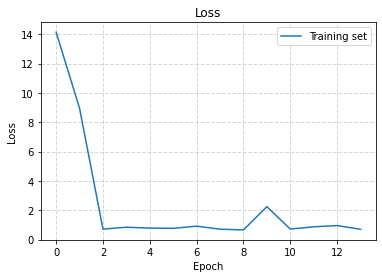

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']

    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)

In [ ]:
simplified_batch_size = 1

model_simplified = build_model(VOCABULARY_SIZE, 256, 1024, simplified_batch_size)
model_simplified.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))

model_simplified.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (1, None, 256)            65536     
                                                                 
 lstm_4 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_4 (Dense)             (1, None, 256)            262400    
                                                                 
Total params: 5,574,912
Trainable params: 5,574,912
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):

    padded_start_string = start_string

    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))

    text_generated = []

    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)

        predictions = tf.squeeze(predictions, 0)

        
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()

        input_indices = tf.expand_dims([predicted_id], 0)

        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]

        text_generated.append(next_character)

    return (padded_start_string + ''.join(text_generated))

In [ ]:
def generate_combinations(model):
    recipe_length = 100
    try_letters = ['Купил мужик шляпу а она ему']
    try_temperature = [1.0, 0.8, 0.4, 0.2,0.1]
    try_temperature1 = np.arange(0.1,1, 0.1)
    print(try_temperature1)
    for letter in try_letters:
        for temperature in try_temperature1:
            generated_text = generate_text(
                model,
                start_string=letter,
                num_generate = recipe_length,
                temperature=temperature
            )
            print(f'Attempt: "{letter}" + {temperature}')
            print('-----------------------------------')
            print(generated_text)
            print('\n\n')

In [ ]:
generate_combinations(model_simplified)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Attempt: "Купил мужик шляпу а она ему" + 0.1
-----------------------------------
Купил мужик шляпу а она ему¤```````¤¤¤¤`љ¤┘¤¤┘┘¤┘┘¤┘┘┘¤¤{┘`¤¤¤¤┘¤`љ¤`¤¤┘¤¤`┘┘┘┘┘┘l┘¤¤`┘¤¤┘¤¤`¤¤¤¤¤┘`¤┘┘`┘¤¤┘¤¤``¤┘┘┘┘┘`┘`¤¤┘┘┘┘



Attempt: "Купил мужик шляпу а она ему" + 0.2
-----------------------------------
Купил мужик шляпу а она ему¤```¤`¤¤љ¤`¤¤љ`┘¤±┘¤┘┘`┘¤┘`┘¤┘Iصљћ┘¤–¤љ`┘`{љ`┘┘`Yl┘`┘┘¤┘¤Y┘Ф–¤¤┘``¤@“¤گ╬┘¤Y¤┘┘┘–¤¤┘¤`H¤{`љ¤ZYљ¤¤┘¤љћ



Attempt: "Купил мужик шляпу а она ему" + 0.30000000000000004
-----------------------------------
Купил мужик шляпу а она ему–┘{¤љ┘–Vq¤g┘љ`љ┘`–┘¤┘↑`љIs`–rљ`┘{¤↑`┘U`–┘{¤┘¤l¤¤¤`┘┘┘¤`ڻ┘љ┘љ{┘љj¤ФљФYљlY┘qr┘8љљ¤┘)گ¤ЦYl¤¤I–گ+Е┘┘┘И¤│



Attempt: "Купил мужик шляпу а она ему" + 0.4
-----------------------------------
Купил мужик шляпу а она ему8╧	zKљ¤`↑ץe┘¤¤g@¤	¬``¶`¤=┘~–Y`گ`=``±T┘t╬`¤	ѠIћlmwlc–љ¤ص┘YيћX↑ъШ¤@–ФT┘q☼┘IљLt`┘¤љ¤љ▐`ћ`¤┌ШطIIUٔ┘┘¤ЫZ┘



Attempt: "Купил мужик шляпу а она ему" + 0.5
-----------------------------------
Купил мужик шляпу

256
